In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import networkx as nx  # it draws the connections to all the points.

In [2]:
#transaction = pd.read_csv('F://groceries.txt', sep='\n')


# or 
with open('F://groceries.txt', mode='r') as f:
    text= f.read()

In [3]:
df= pd.DataFrame(text.split('\n'),columns=['Description'])

In [4]:
df.head()

,Description
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


In [5]:
def intolist(desc):
    return desc.split(',')

In [6]:
df['Description']= df['Description'].apply(intolist)
df.head()

,Description
0,"[citrus fruit, semi-finished bread, margarine,..."
1,"[tropical fruit, yogurt, coffee]"
2,[whole milk]
3,"[pip fruit, yogurt, cream cheese , meat spreads]"
4,"[other vegetables, whole milk, condensed milk,..."


In [7]:
from mlxtend.preprocessing import TransactionEncoder
te= TransactionEncoder()# list of transaction into DF

In [8]:
bolean_tr= te.fit_transform(df['Description'])
df1 = pd.DataFrame(data=bolean_tr,columns=te.columns_)
df1

,,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [9]:
from mlxtend.frequent_patterns import apriori, association_rules

In [51]:
df_ap= apriori(df1,min_support=0.04, use_colnames=True)
df_ap        # this gives me probability of all values min_support is threshold

,support,itemsets
0,0.052460,(beef)
1,0.080521,(bottled beer)
2,0.110512,(bottled water)
3,0.064864,(brown bread)
4,0.055409,(butter)
5,0.077674,(canned beer)
6,0.042904,(chicken)
7,0.049614,(chocolate)
8,0.082757,(citrus fruit)
9,0.058052,(coffee)


In [52]:
# Applying rules
df_ar = association_rules(df_ap, metric='lift',min_threshold=1.1)
df_ar


# antecedents---> is input
# consequents is output

# select confidence ---> only if lift is more than one.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(rolls/buns),0.193473,0.183916,0.042599,0.220179,1.197168,0.007016,1.046501
1,(rolls/buns),(other vegetables),0.183916,0.193473,0.042599,0.231620,1.197168,0.007016,1.049646
2,(root vegetables),(other vegetables),0.108987,0.193473,0.047377,0.434701,2.246833,0.026291,1.426728
3,(other vegetables),(root vegetables),0.193473,0.108987,0.047377,0.244877,2.246833,0.026291,1.179956
4,(whole milk),(other vegetables),0.255490,0.193473,0.074827,0.292877,1.513788,0.025397,1.140575
5,(other vegetables),(whole milk),0.193473,0.255490,0.074827,0.386758,1.513788,0.025397,1.214055
6,(yogurt),(other vegetables),0.139488,0.193473,0.043412,0.311224,1.608620,0.016425,1.170958
7,(other vegetables),(yogurt),0.193473,0.139488,0.043412,0.224383,1.608620,0.016425,1.109455
8,(whole milk),(rolls/buns),0.255490,0.183916,0.056629,0.221647,1.205154,0.009640,1.048476
9,(rolls/buns),(whole milk),0.183916,0.255490,0.056629,0.307905,1.205154,0.009640,1.075734


In [53]:
tree= df_ar[['antecedents','consequents']]

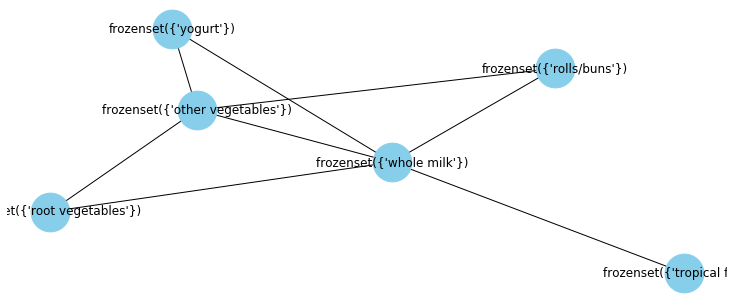

In [54]:
#build your graph:
G= nx.from_pandas_edgelist(tree,'antecedents','consequents')

plt.figure(figsize=(10,4))
nx.draw(G, with_labels=True, node_color='skyblue',node_size=1500, 
        edge_cmap= plt.cm.Blues)

plt.show()


# for more leafs change min_support